In [ ]:
!uv init

Initialized project `content`


In [ ]:
!uv add kagglehub numpy pandas matplotlib tensorflow[and-cuda]

Using CPython 3.12.12 interpreter at: /usr/bin/python3
Creating virtual environment at: .venv
Resolved 65 packages in 1.04s
Prepared 62 packages in 1m 44s
Installed 62 packages in 3.02s
 + absl-py==2.4.0
 + astunparse==1.6.3
 + certifi==2026.1.4
 + charset-normalizer==3.4.4
 + contourpy==1.3.3
 + cycler==0.12.1
 + flatbuffers==25.12.19
 + fonttools==4.61.1
 + gast==0.7.0
 + google-pasta==0.2.0
 + grpcio==1.78.0
 + h5py==3.15.1
 + idna==3.11
 + kagglehub==1.0.0
 + kagglesdk==0.1.15
 + keras==3.13.2
 + kiwisolver==1.4.9
 + libclang==18.1.1
 + markdown==3.10.2
 + markdown-it-py==4.0.0
 + markupsafe==3.0.3
 + matplotlib==3.10.8
 + mdurl==0.1.2
 + ml-dtypes==0.5.4
 + namex==0.1.0
 + numpy==2.4.2
 + nvidia-cublas-cu12==12.9.1.4
 + nvidia-cuda-cupti-cu12==12.9.79
 + nvidia-cuda-nvcc-cu12==12.9.86
 + nvidia-cuda-nvrtc-cu12==12.9.86
 + nvidia-cuda-runtime-cu12==12.9.79
 + nvidia-cudnn-cu12==9.19.0.56
 + nvidia-cufft-cu12==11.4.1.4
 + nvidia-curand-cu12==10.3.10.19
 + nvidia-cusolver-cu12==11.7.

In [ ]:
!uv add transformers sentencepiece datasets evaluate accelerate evaluate rouge_score  torch torchvision torchaudio fastai

Resolved 172 packages in 2.65s
Prepared 107 packages in 1m 59s
Uninstalled 11 packages in 80ms
Installed 107 packages in 931ms
 + accelerate==1.12.0
 + aiohappyeyeballs==2.6.1
 + aiohttp==3.13.3
 + aiosignal==1.4.0
 + annotated-doc==0.0.4
 + annotated-types==0.7.0
 + anyio==4.12.1
 + apsw==3.51.2.0
 + apswutils==0.1.2
 + attrs==25.4.0
 + beartype==0.22.9
 + beautifulsoup4==4.14.3
 + blis==1.3.3
 + catalogue==2.0.10
 + click==8.3.1
 + cloudpathlib==0.23.0
 + cloudpickle==3.1.2
 + confection==0.1.5
 + cymem==2.0.13
 + datasets==4.5.0
 + dill==0.4.0
 + evaluate==0.4.6
 + fastai==2.8.6
 + fastcore==1.12.13
 + fastdownload==0.0.7
 + fastlite==0.2.4
 + fastprogress==1.1.5
 + fasttransform==0.0.2
 + filelock==3.21.2
 + frozenlist==1.8.0
 + fsspec==2025.10.0
 + h11==0.16.0
 + hf-xet==1.2.0
 + httpcore==1.0.9
 + httptools==0.7.1
 + httpx==0.28.1
 + huggingface-hub==1.4.1
 + itsdangerous==2.2.0
 + jinja2==3.1.6
 + joblib==1.5.3
 + mpmath==1.3.0
 + multidict==6.7.1
 + multiprocess==0.70.18
 + mur

In [ ]:
# !uv sync --upgrage

In [ ]:
import sys

venv_path = "/content/.venv/lib/python3.12/site-packages"
if venv_path not in sys.path:
    sys.path.insert(0, venv_path)

print(sys.path)

['/content/.venv/lib/python3.12/site-packages', '/content', '/env/python', '/usr/lib/python312.zip', '/usr/lib/python3.12', '/usr/lib/python3.12/lib-dynload', '', '/usr/local/lib/python3.12/dist-packages', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.12/dist-packages/IPython/extensions', '/root/.ipython']


In [ ]:
# %pip install kagglehub

In [ ]:
import kagglehub

path = kagglehub.dataset_download("amritvirsinghx/environmental-news-nlp-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'environmental-news-nlp-dataset' dataset.
Path to dataset files: /kaggle/input/environmental-news-nlp-dataset


In [ ]:
import os

base_path = path
os.listdir(base_path)


['TelevisionNews']

In [ ]:
os.listdir(base_path + "/TelevisionNews")

['CNN.201201.csv',
 'MSNBC.201901.csv',
 'FOXNEWS.201103.csv',
 'BBCNEWS.201906.csv',
 'FOXNEWS.201304.csv',
 'FOXNEWS.201706.csv',
 'CNN.201106.csv',
 'MSNBC.201706.csv',
 'MSNBC.201112.csv',
 'MSNBC.201201.csv',
 'FOXNEWS.201101.csv',
 'CNN.201808.csv',
 'FOXNEWS.201609.csv',
 'CNN.201804.csv',
 'FOXNEWS.201011.csv',
 'CNN.201906.csv',
 'FOXNEWS.201012.csv',
 'FOXNEWS.201106.csv',
 'FOXNEWS.201206.csv',
 'CNN.201309.csv',
 'CNN.201905.csv',
 'BBCNEWS.201904.csv',
 'MSNBC.201907.csv',
 'CNN.201005.csv',
 'BBCNEWS.201905.csv',
 'CNN.201508.csv',
 'FOXNEWS.201910.csv',
 'CNN.201312.csv',
 'MSNBC.201511.csv',
 'CNN.201806.csv',
 'CNN.201605.csv',
 'FOXNEWS.201612.csv',
 'FOXNEWS.201403.csv',
 'FOXNEWS.201502.csv',
 'MSNBC.201001.csv',
 'BBCNEWS.201802.csv',
 'CNN.201903.csv',
 'CNN.201203.csv',
 'FOXNEWS.201906.csv',
 'FOXNEWS.200911.csv',
 'CNN.201204.csv',
 'MSNBC.201011.csv',
 'CNN.201009.csv',
 'CNN.201007.csv',
 'MSNBC.201810.csv',
 'MSNBC.201502.csv',
 'MSNBC.201808.csv',
 'FOXNEWS

In [ ]:
import pandas as pd

folder_path = os.path.join(base_path, "TelevisionNews")
print(folder_path)

csv_files = [f for f in os.listdir(folder_path) if f.endswith(".csv")]

len(csv_files)


/kaggle/input/environmental-news-nlp-dataset/TelevisionNews


418

In [ ]:
df_list = []

skipped_files = 0

for file in csv_files:
    file_path = os.path.join(folder_path, file)
    try:
        temp_df = pd.read_csv(file_path)
        if not temp_df.empty:
            df_list.append(temp_df)
        else:
            skipped_files += 1
    except Exception:
        skipped_files += 1

df = pd.concat(df_list, ignore_index=True)

print("Merged shape:", df.shape)
print("Skipped files:", skipped_files)

Merged shape: (94858, 7)
Skipped files: 1


In [ ]:
df.columns
df.head(2)

,URL,MatchDateTime,Station,Show,IAShowID,IAPreviewThumb,Snippet
0,https://archive.org/details/CNNW_20120121_0200...,1/21/2012 2:10:10,CNN,Piers Morgan Tonight,CNNW_20120121_020000_Piers_Morgan_Tonight,https://archive.org/download/CNNW_20120121_020...,sense that if you look at the two leading cand...
1,https://archive.org/details/CNNW_20120127_0100...,1/27/2012 2:58:38,CNN,Fl Rep-Debate,CNNW_20120127_010000_Fl_Rep-Debate,https://archive.org/download/CNNW_20120127_010...,bailouts like these two men were. governor rom...


In [ ]:
df.shape


(94858, 7)

In [ ]:
df['Snippet'].isnull().sum()


np.int64(0)

In [ ]:
df['snippet_length'] = df['Snippet'].astype(str).apply(lambda x: len(x.split()))

df['snippet_length'].describe()


count    94858.000000
mean        41.155042
std          9.604375
min          2.000000
25%         35.000000
50%         41.000000
75%         47.000000
max        194.000000
Name: snippet_length, dtype: float64

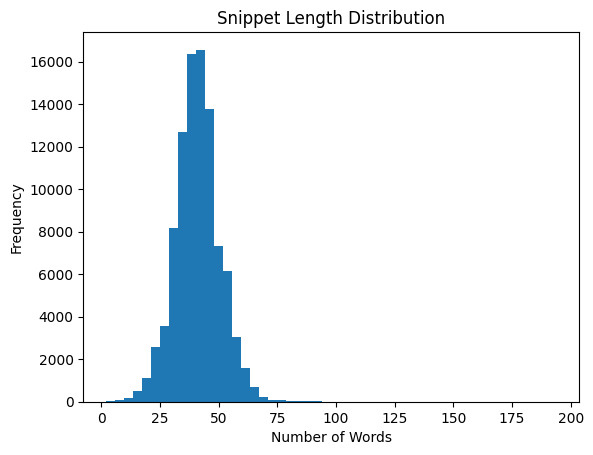

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
plt.hist(df['snippet_length'], bins=50)
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.title("Snippet Length Distribution")
plt.show()


<Figure size 1000x600 with 0 Axes>

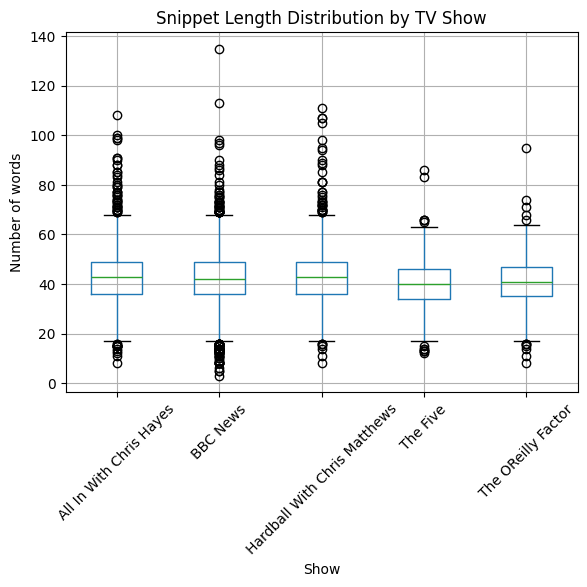

In [ ]:
import matplotlib.pyplot as plt

top_shows = df['Show'].value_counts().head(5).index

subset = df[df['Show'].isin(top_shows)]

plt.figure(figsize=(10,6))
subset.boxplot(column='snippet_length', by='Show', rot=45)
plt.title("Snippet Length Distribution by TV Show")
plt.suptitle("")
plt.ylabel("Number of words")
plt.show()


In [ ]:
df[['Snippet']].isnull().sum()

Snippet    0
dtype: int64

In [ ]:
df['clean_snippet'] = df['Snippet'].astype(str).str.strip()


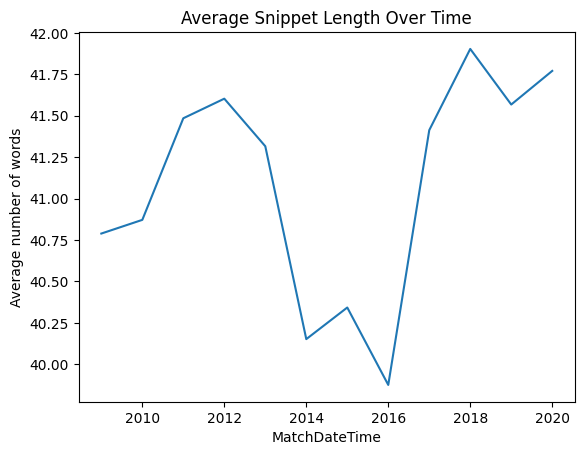

In [ ]:
df['MatchDateTime'] = pd.to_datetime(df['MatchDateTime'], errors='coerce')

df.groupby(df['MatchDateTime'].dt.year)['snippet_length'].mean().plot()
plt.title("Average Snippet Length Over Time")
plt.ylabel("Average number of words")
plt.show()


# **Milestone 2**

### Target(Label) Generation

In [ ]:
# !uv add tensorflow[and-cuda]

In [ ]:
# %pip install tensorflow[and-cuda] -U

In [ ]:
import numpy as np
import pandas as pd
import re
import nltk
from nltk.tokenize import sent_tokenize
from collections import Counter
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

nltk.download('punkt')
nltk.download('punkt_tab')

# --- 1. Preprocessing &  Label Generation ---

def preprocess_text(text):
    text = str(text).lower()
    text = re.sub(r'\s+', ' ', text)
    text = re.sub(r"[^a-zA-Z0-9. ]", "", text) # Remove special chars
    return text.strip()

# Create "Targets"
def create_pseudo_summary(text, n_sentences=1):
    sentences = sent_tokenize(text)
    if len(sentences) <= n_sentences:
        return text # If short, target = input

    # Word frequency scoring
    words = re.findall(r'\w+', text.lower())
    freq = Counter(words)

    scores = {}
    for sent in sentences:
        score = sum(freq[word] for word in sent.lower().split())
        scores[sent] = score

    ranked = sorted(scores, key=scores.get, reverse=True)
    summary = ' '.join(ranked[:n_sentences])
    return summary

# Apply to dataframe
print("Generating target summaries for training...")
df['clean_text'] = df['Snippet'].apply(preprocess_text)
df['target_summary'] = df['Snippet'].apply(lambda x: create_pseudo_summary(x, n_sentences=1))
df['target_summary'] = df['target_summary'].apply(preprocess_text)

# Add Start and End tokens for the Decoder
# "sostok" = Start of Sentence, "eostok" = End of Sentence
df['target_summary'] = df['target_summary'].apply(lambda x: 'sostok ' + x + ' eostok')

print("Data Prepared. Sample:")
print("Input: ", df['clean_text'].iloc[0])
print("Target:", df['target_summary'].iloc[0])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Generating target summaries for training...
Data Prepared. Sample:
Input:  sense that if you look at the two leading candidates gingrich and romney there are three issues that started the tea party. obamacare the government takeover of cap and trade and global warming.
Target: sostok sense that if you look at the two leading candidates gingrich and romney there are three issues that started the tea party. eostok


## Vectorization

In [ ]:
# --- 2. Tokenization ---

# Hyperparameters
MAX_TEXT_LEN = 50   # Input Snippet max length
MAX_SUM_LEN = 20    # Summary max length
VOCAB_SIZE = 10000  # Size of vocabulary

# Split data
x_tr, x_val, y_tr, y_val = train_test_split(
    np.array(df['clean_text']),
    np.array(df['target_summary']),
    test_size=0.2,
    random_state=42,
    shuffle=True
)

# Text Tokenizer (Source)
x_tokenizer = Tokenizer(num_words=VOCAB_SIZE)
x_tokenizer.fit_on_texts(list(x_tr))

# Convert to sequences
x_tr_seq = x_tokenizer.texts_to_sequences(x_tr)
x_val_seq = x_tokenizer.texts_to_sequences(x_val)

# Padding
x_tr = pad_sequences(x_tr_seq,  maxlen=MAX_TEXT_LEN, padding='post')
x_val = pad_sequences(x_val_seq, maxlen=MAX_TEXT_LEN, padding='post')

# Summary Tokenizer (Target)
y_tokenizer = Tokenizer(num_words=VOCAB_SIZE)
y_tokenizer.fit_on_texts(list(y_tr))

# Convert to sequences
y_tr_seq = y_tokenizer.texts_to_sequences(y_tr)
y_val_seq = y_tokenizer.texts_to_sequences(y_val)

# Padding
y_tr = pad_sequences(y_tr_seq, maxlen=MAX_SUM_LEN, padding='post')
y_val = pad_sequences(y_val_seq, maxlen=MAX_SUM_LEN, padding='post')

# Vocabulary sizes (+1 for padding)
x_voc = x_tokenizer.num_words + 1
y_voc = y_tokenizer.num_words + 1

print(f"Source Vocab: {x_voc}, Target Vocab: {y_voc}")
print(f"Training shape: {x_tr.shape}")

Source Vocab: 10001, Target Vocab: 10001
Training shape: (75886, 50)


## Building seq-to-seq with attention

### Hyperparameter Choices
- Embedding Dimension (100): We project our vocabulary into a 100-dimensional - vector space. This is a compact representation sufficient for our vocabulary size (~10,000 words) without requiring excessive memory.

- Latent Dimension (256): The LSTM layers have 256 internal units. This defines the model's "memory capacity." A size of 256 provides enough complexity to learn sentence structures without being so large that it massively overfits our relatively small dataset.

- Vocab Size (10,000): We limit our vocabulary to the top 10,000 most frequent words to reduce noise from rare typos and keep the model computationally feasible.

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed, AdditiveAttention
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping

# --- 3. Model Architecture ---

LATENT_DIM = 256
EMBEDDING_DIM = 100

# 1. Encoder
encoder_inputs = Input(shape=(MAX_TEXT_LEN,), name="Encoder_Input")

# Encoder Embedding (Learned from scratch)
enc_emb = Embedding(x_voc, EMBEDDING_DIM, trainable=True, name="Encoder_Embedding")(encoder_inputs)

# Encoder LSTM 1
encoder_lstm1 = LSTM(LATENT_DIM, return_sequences=True, return_state=True, dropout=0.4, recurrent_dropout=0.0, name="Enc_LSTM_1")
encoder_output1, state_h1, state_c1 = encoder_lstm1(enc_emb)

# Encoder LSTM 2
encoder_lstm2 = LSTM(LATENT_DIM, return_sequences=True, return_state=True, dropout=0.4, recurrent_dropout=0.0, name="Enc_LSTM_2")
encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1)

# Encoder LSTM 3 (Final Layer)
encoder_lstm3 = LSTM(LATENT_DIM, return_sequences=True, return_state=True, dropout=0.4, recurrent_dropout=0.0, name="Enc_LSTM_3")
encoder_outputs, state_h, state_c = encoder_lstm3(encoder_output2)

# 2. Decoder
decoder_inputs = Input(shape=(None,), name="Decoder_Input")

# Decoder Embedding (Learned from scratch)
dec_emb_layer = Embedding(y_voc, EMBEDDING_DIM, trainable=True, name="Decoder_Embedding")
dec_emb = dec_emb_layer(decoder_inputs)

# Decoder LSTM
decoder_lstm = LSTM(LATENT_DIM, return_sequences=True, return_state=True, dropout=0.4, recurrent_dropout=0.0, name="Dec_LSTM")
# We initialize the decoder with the Encoder's final states
decoder_outputs, decoder_fwd_state, decoder_back_state = decoder_lstm(dec_emb, initial_state=[state_h, state_c])

# 3. Attention Layer
# Attention connects Encoder outputs and Decoder outputs
attn_layer = AdditiveAttention(name="Attention_Layer")
attn_out = attn_layer([decoder_outputs, encoder_outputs])

# Concatenate Attention output and Decoder LSTM output
decoder_concat_input = Concatenate(axis=-1, name="Concat_Layer")([decoder_outputs, attn_out])

# 4. Output Layer
# TimeDistributed allows generating a word for every time step
decoder_dense = TimeDistributed(Dense(y_voc, activation='softmax'), name="Output_Layer")
decoder_outputs = decoder_dense(decoder_concat_input)

# Define the Model
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ Encoder_Input       │ (None, 50)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Encoder_Embedding   │ (None, 50, 100)   │  1,000,100 │ Encoder_Input[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Enc_LSTM_1 (LSTM)   │ [(None, 50, 256), │    365,568 │ Encoder_Embeddin… │
│                     │ (None, 256),      │            │                   │
│                     │ (None, 256)]      │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Decoder_Input       │ (None, None)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Enc_LSTM_2 (LSTM)   │ [(None, 50, 256), │    525,312 │ Enc_LSTM_1[0][0]  │
│                     │ (None, 256),      │            │                   │
│                     │ (None, 256)]      │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Decoder_Embedding   │ (None, None, 100) │  1,000,100 │ Decoder_Input[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Enc_LSTM_3 (LSTM)   │ [(None, 50, 256), │    525,312 │ Enc_LSTM_2[0][0]  │
│                     │ (None, 256),      │            │                   │
│                     │ (None, 256)]      │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Dec_LSTM (LSTM)     │ [(None, None,     │    365,568 │ Decoder_Embeddin… │
│                     │ 256), (None,      │            │ Enc_LSTM_3[0][1], │
│                     │ 256), (None,      │            │ Enc_LSTM_3[0][2]  │
│                     │ 256)]             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Attention_Layer     │ (None, None, 256) │        256 │ Dec_LSTM[0][0],   │
│ (AdditiveAttention) │                   │            │ Enc_LSTM_3[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Concat_Layer        │ (None, None, 512) │          0 │ Dec_LSTM[0][0],   │
│ (Concatenate)       │                   │            │ Attention_Layer[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Output_Layer        │ (None, None,      │  5,130,513 │ Concat_Layer[0][… │
│ (TimeDistributed)   │ 10001)            │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 8,912,729 (34.00 MB)

 Trainable params: 8,912,729 (34.00 MB)

 Non-trainable params: 0 (0.00 B)

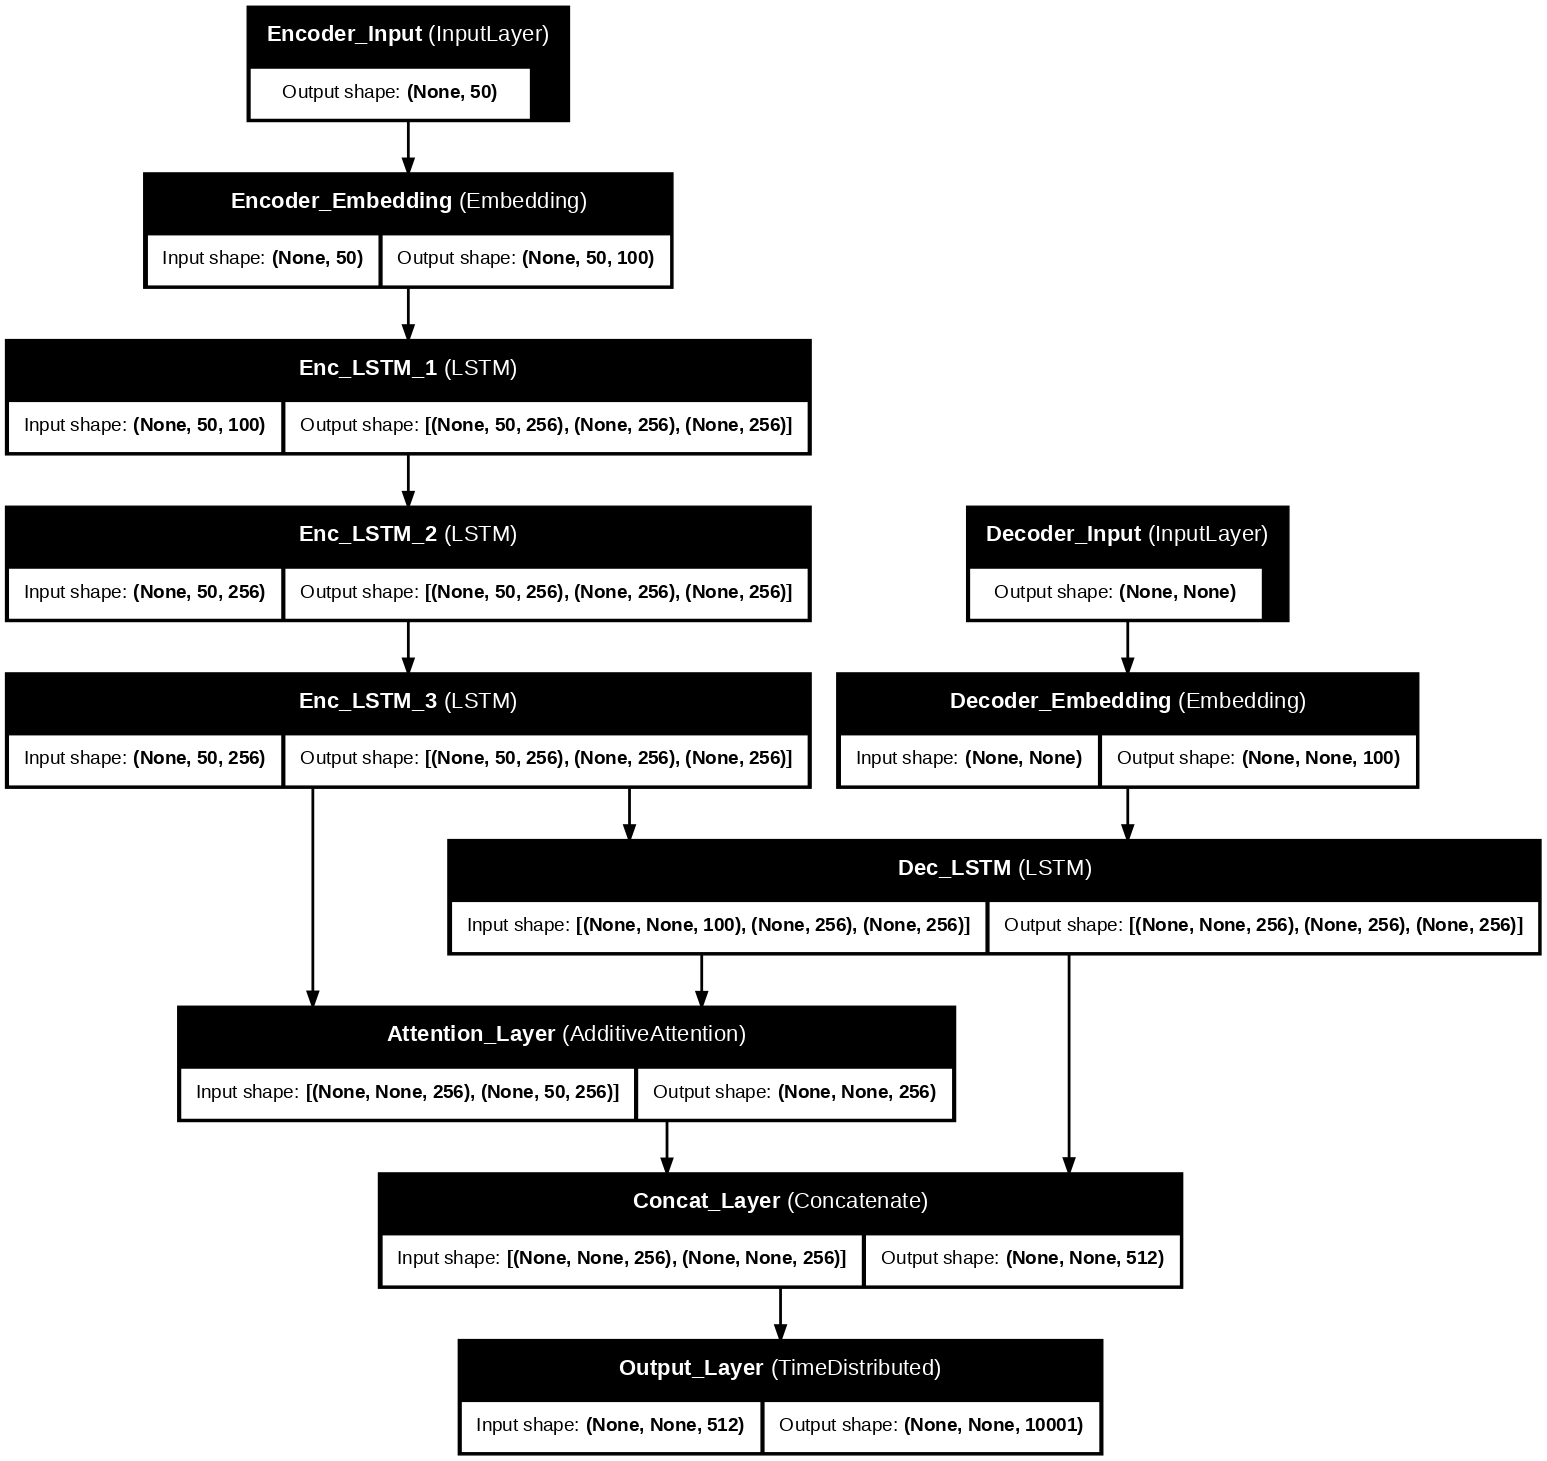

In [ ]:
import tensorflow as tf
from tensorflow.keras.utils import plot_model

plot_model(
    model,
    to_file='model_architecture_m2.png',
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    rankdir='TB',
    expand_nested=False,
    dpi=100
)

### Architecture Evaluation
#### Model Complexity & Parameters:

- Total Parameters: ~8.9 Million.

- Trainable Parameters: ~8.9 Million.

- Non-trainable Parameters: 0.

#### Analysis:
The model architecture visual reveals a "many-to-many" connection structure facilitated by the Attention layer.
- Embedding Layer Impact: A significant portion of our parameters comes from the Embedding layer (Vocab Size 10,000 * Embedding Dim 100 = 1 Million parameters). This layer is learned from scratch, meaning the model is learning the semantic meaning of words specifically for environmental news.

- Potential Risks: With 8.9 million parameters and a training set of ~75k samples, there is a risk of overfitting. The model has high capacity (ability to memorize), so techniques like the EarlyStopping callback we implemented are essential to halt training before the model starts memorizing noise instead of learning patterns.

## Training and Testing

In [ ]:
import tensorflow as tf
print("GPUs Local:", tf.config.list_physical_devices('GPU'))

GPUs Local: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [ ]:
# --- 4. Compile and Train ---

model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# prevent overfitting
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=2)

# Training
history = model.fit(
    [x_tr, y_tr[:, :-1]], # Inputs: Source Snippet + Summary (minus last word)
    y_tr.reshape(y_tr.shape[0], y_tr.shape[1], 1)[:, 1:], # Target: Summary (shifted by 1)
    epochs=40, #Reminder for me: change no epochs to 40
    callbacks=[es],
    batch_size=60,
    validation_data=([x_val, y_val[:, :-1]], y_val.reshape(y_val.shape[0], y_val.shape[1], 1)[:, 1:])
)

Epoch 1/40
1265/1265 ━━━━━━━━━━━━━━━━━━━━ 116s 84ms/step - accuracy: 0.2191 - loss: 5.3365 - val_accuracy: 0.2585 - val_loss: 4.9306
Epoch 2/40
1265/1265 ━━━━━━━━━━━━━━━━━━━━ 106s 84ms/step - accuracy: 0.2802 - loss: 4.7368 - val_accuracy: 0.2929 - val_loss: 4.5829
Epoch 3/40
1265/1265 ━━━━━━━━━━━━━━━━━━━━ 106s 84ms/step - accuracy: 0.2987 - loss: 4.5333 - val_accuracy: 0.3069 - val_loss: 4.4462
Epoch 4/40
1265/1265 ━━━━━━━━━━━━━━━━━━━━ 106s 84ms/step - accuracy: 0.3098 - loss: 4.4093 - val_accuracy: 0.3163 - val_loss: 4.3520
Epoch 5/40
1265/1265 ━━━━━━━━━━━━━━━━━━━━ 106s 84ms/step - accuracy: 0.3195 - loss: 4.2983 - val_accuracy: 0.3249 - val_loss: 4.2597
Epoch 6/40
1265/1265 ━━━━━━━━━━━━━━━━━━━━ 107s 84ms/step - accuracy: 0.3271 - loss: 4.2074 - val_accuracy: 0.3310 - val_loss: 4.1892
Epoch 7/40
1265/1265 ━━━━━━━━━━━━━━━━━━━━ 107s 84ms/step - accuracy: 0.3338 - loss: 4.1268 - val_accuracy: 0.3377 - val_loss: 4.1256
Epoch 8/40
1265/1265 ━━━━━━━━━━━━━━━━━━━━ 107s 84ms/step - accuracy: 

## Generate Summarizes (Inference)

In [ ]:
# --- 5. Inference / Evaluation Models ---

# Reverse dictionaries to convert Integers back to Words
reverse_target_word_index = y_tokenizer.index_word
reverse_source_word_index = x_tokenizer.index_word
target_word_index = y_tokenizer.word_index

# Encode the input sequence to get the feature vector
encoder_model = Model(inputs=encoder_inputs, outputs=[encoder_outputs, state_h, state_c])

# Decoder Inference
# Inputs to the decoder during inference
decoder_state_input_h = Input(shape=(LATENT_DIM,))
decoder_state_input_c = Input(shape=(LATENT_DIM,))
decoder_hidden_state_input = Input(shape=(MAX_TEXT_LEN, LATENT_DIM))

# Get the embeddings of the decoder sequence
dec_emb2 = dec_emb_layer(decoder_inputs)

# To predict the next word in the sequence, set the initial states to the states from the previous time step
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=[decoder_state_input_h, decoder_state_input_c])

# Attention inference
attn_out_inf = attn_layer([decoder_outputs2, decoder_hidden_state_input])
decoder_inf_concat = Concatenate(axis=-1, name="Concat")([decoder_outputs2, attn_out_inf])

# A dense softmax layer to generate prob dist. over the target vocabulary
decoder_outputs2 = decoder_dense(decoder_inf_concat)

# Final decoder model
decoder_model = Model(
    [decoder_inputs] + [decoder_hidden_state_input, decoder_state_input_h, decoder_state_input_c],
    [decoder_outputs2] + [state_h2, state_c2])

def decode_sequence(input_seq):
    # Encode the input as state vectors.
    e_out, e_h, e_c = encoder_model.predict(input_seq, verbose=0)

    # Generate empty target sequence of length 1.
    target_seq = np.zeros((1,1))

    # Populate the first word of target sequence with the start word.
    target_seq[0, 0] = target_word_index['sostok']

    stop_condition = False
    decoded_sentence = ''

    while not stop_condition:
        output_tokens, h, c = decoder_model.predict([target_seq] + [e_out, e_h, e_c], verbose=0)

        # Sample a token
        sampled_token_index = np.argmax(output_tokens[0, -1, :])

        # Handle unknown tokens (if index 0 is sampled)
        if sampled_token_index == 0:
            sampled_token = ""
        else:
            sampled_token = reverse_target_word_index[sampled_token_index]

        if(sampled_token!='eostok'):
            decoded_sentence += ' ' + sampled_token

        # Exit condition: either hit max length or find stop word.
        if (sampled_token == 'eostok' or len(decoded_sentence.split()) >= (MAX_SUM_LEN-1)):
            stop_condition = True

        # Update the target sequence (of length 1).
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index

        # Update internal states
        e_h, e_c = h, c

    return decoded_sentence

# --- 6. Visualization ---
def seq2text(input_seq):
    newString=''
    for i in input_seq:
        if(i!=0):
            newString=newString+reverse_source_word_index[i]+' '
    return newString

def seq2summary(input_seq):
    newString=''
    for i in input_seq:
        if((i!=0 and i!=target_word_index['sostok']) and i!=target_word_index['eostok']):
            newString=newString+reverse_target_word_index[i]+' '
    return newString

print("\n--- RESULTS ---\n")
for i in range(0, 20):
    print("Original Text:", seq2text(x_tr[i]))
    print("Target Summary:", seq2summary(y_tr[i]))
    print("Predicted Summary:", decode_sequence(x_tr[i].reshape(1,MAX_TEXT_LEN)))
    print("\n")


--- RESULTS ---

Original Text: emissions not to mention easing the of people who spend hundreds of extra hours in their cars every year this year mexico pledged to reduce greenhouse gas emissions by 22 by 2030 for mexico and other developing 
Target Summary: this year mexico pledged to reduce greenhouse gas emissions by 22 by 2030 for mexico and other developing 
Predicted Summary:  emissions not to mention carboncutting the of people who spend hundreds of extra hours in their cars every year


Original Text: announced he wants to take billions of dollars from hard working americans to fight climate change unbelievable time for comments 2020 democrats are these people trying to each other each fantasy is getting wilder 
Target Summary: announced he wants to take billions of dollars from hard working americans to fight climate change 
Predicted Summary:  announced he wants to take billions of dollars from hard working americans to fight climate change


Original Text: after the agency

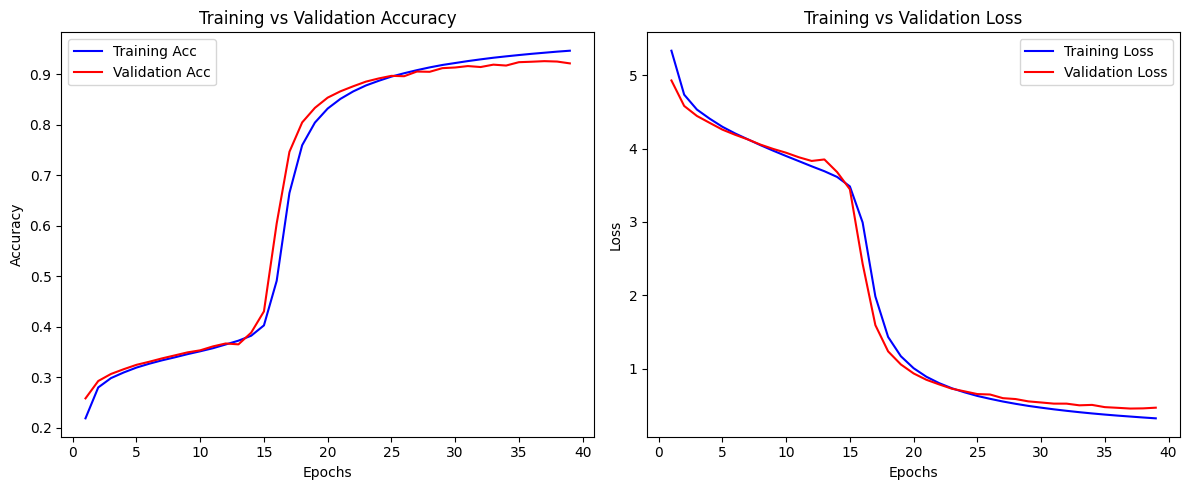


Calculating F1 Score on 500 validation samples...
Sample 0: F1 = 0.8108
Sample 10: F1 = 1.0000
Sample 20: F1 = 0.8696
Sample 30: F1 = 0.0000
Sample 40: F1 = 0.1053
Sample 50: F1 = 0.2000
Sample 60: F1 = 0.0000
Sample 70: F1 = 0.7200
Sample 80: F1 = 0.5263
Sample 90: F1 = 0.5789
Sample 100: F1 = 0.3226
Sample 110: F1 = 0.6667
Sample 120: F1 = 0.5882
Sample 130: F1 = 0.2500
Sample 140: F1 = 0.1176
Sample 150: F1 = 0.0645
Sample 160: F1 = 0.5625
Sample 170: F1 = 1.0000
Sample 180: F1 = 1.0000
Sample 190: F1 = 0.5789
Sample 200: F1 = 0.0000
Sample 210: F1 = 0.5263
Sample 220: F1 = 0.1379
Sample 230: F1 = 0.6286
Sample 240: F1 = 0.0000
Sample 250: F1 = 0.6667
Sample 260: F1 = 0.8824
Sample 270: F1 = 0.8333
Sample 280: F1 = 0.5405
Sample 290: F1 = 0.9375
Sample 300: F1 = 0.6471
Sample 310: F1 = 1.0000
Sample 320: F1 = 0.5946
Sample 330: F1 = 0.7895
Sample 340: F1 = 0.0000
Sample 350: F1 = 0.2105
Sample 360: F1 = 0.0000
Sample 370: F1 = 0.0571
Sample 380: F1 = 0.2759
Sample 390: F1 = 0.8235


In [ ]:
import matplotlib.pyplot as plt
from collections import Counter

# --- 7. Plotting Accuracy & Loss ---

def plot_training_history(history):
    """
    Plots the training and validation accuracy and loss.
    """
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))

    # Plot Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'b-', label='Training Acc')
    plt.plot(epochs, val_acc, 'r-', label='Validation Acc')
    plt.title('Training vs Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot Loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'b-', label='Training Loss')
    plt.plot(epochs, val_loss, 'r-', label='Validation Loss')
    plt.title('Training vs Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_training_history(history)


# --- 8. Computing F1-Score (ROUGE-1 Style) ---

def calculate_text_f1(reference_text, predicted_text):
    """
    Calculates F1 score based on word overlap between reference and prediction.
    """
    # Tokenize by splitting on whitespace (simple tokenization)
    ref_tokens = reference_text.lower().split()
    pred_tokens = predicted_text.lower().split()

    if len(pred_tokens) == 0:
        return 0.0

    # Count word frequencies
    ref_counter = Counter(ref_tokens)
    pred_counter = Counter(pred_tokens)

    # Calculate overlaps
    overlap = 0
    for token in pred_counter:
        overlap += min(pred_counter[token], ref_counter.get(token, 0))

    # Precision: Overlap / Total Predicted Words
    precision = overlap / len(pred_tokens)

    # Recall: Overlap / Total Reference Words
    recall = overlap / len(ref_tokens) if len(ref_tokens) > 0 else 0

    # F1 Calculation
    if precision + recall == 0:
        return 0.0

    f1 = 2 * (precision * recall) / (precision + recall)
    return f1

def evaluate_model_f1(x_data, y_data, num_samples=100):
    """
    Runs inference on a subset of data and calculates the average F1 score.
    """
    total_f1 = 0
    count = 0

    print(f"\nCalculating F1 Score on {num_samples} validation samples...")

    # Loop through the validation set
    for i in range(min(len(x_data), num_samples)):
        input_seq = x_data[i].reshape(1, MAX_TEXT_LEN)

        # 1. Get Reference Summary (Ground Truth)
        # Note: We skip 'sostok' and 'eostok' for fair comparison
        reference = seq2summary(y_data[i])

        # 2. Get Predicted Summary (Model Output)
        prediction = decode_sequence(input_seq)

        # 3. Calculate F1
        score = calculate_text_f1(reference, prediction)
        total_f1 += score
        count += 1

        #Print progress every 10 samples
        if i % 10 == 0:
            print(f"Sample {i}: F1 = {score:.4f}")

    avg_f1 = total_f1 / count
    print(f"\nAverage F1 Score: {avg_f1:.4f}")
    return avg_f1

# Run Evaluation on Validation Set
average_f1 = evaluate_model_f1(x_val, y_val, num_samples=500)#Reminder for me: Change no samples to 500

# **Milestone 3**

In [ ]:
!uv --version

uv 0.10.0


In [ ]:
# !uv init

In [ ]:
!ls

main.py			   pyproject.toml  sample_data
model_architecture_m2.png  README.md	   uv.lock


In [ ]:
# !uv add transformers sentencepiece datasets evaluate accelerate evaluate rouge_score

In [ ]:
# %pip install transformers sentencepiece datasets evaluate accelerate evaluate rouge_score -U

In [ ]:
import torch
torch.cuda.is_available()

True

In [ ]:
# !uv add datasets evaluate accelerate

In [ ]:
# %pip install datasets evaluate accelerate -U

### Modify data from Milestone 2
We strip the special tokens we added in Milestone 2 and create the Hugging Face dataset.

In [ ]:
import pandas as pd
from datasets import Dataset

# 1. Clean the 'sostok' and 'eostok' tags from Milestone 2 targets
# BART adds its own special tokens automatically.
def clean_tags(text):
    return text.replace('sostok ', '').replace(' eostok', '')

# Create a fresh copy for M3 to avoid warnings
df_m3 = df[['clean_text', 'target_summary']].copy()
df_m3['target_summary'] = df_m3['target_summary'].apply(clean_tags)

# 2. Convert to Hugging Face Dataset
train_size = 5000
dataset = Dataset.from_pandas(df_m3.iloc[:train_size])

# 3. Split into Train and Test (Validation)
# This satisfies the "Evaluation on Unseen Text" requirement
split_datasets = dataset.train_test_split(test_size=0.2, seed=42)
print(split_datasets)

DatasetDict({
    train: Dataset({
        features: ['clean_text', 'target_summary'],
        num_rows: 4000
    })
    test: Dataset({
        features: ['clean_text', 'target_summary'],
        num_rows: 1000
    })
})


### Tokenization
We prepare the inputs (News Snippet) and labels (Summary) for the model.

In [ ]:
from transformers import AutoTokenizer

model_checkpoint = "facebook/bart-large-cnn"
tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)

max_input_length = 512
max_target_length = 60

def preprocess_function(examples):
    # Tokenize the inputs (News Snippets)
    model_inputs = tokenizer(
        examples["clean_text"],
        max_length=max_input_length,
        truncation=True,
        padding="max_length"
    )

    # Tokenize the targets (Summaries) using 'text_target'
    labels = tokenizer(
        text_target=examples["target_summary"],
        max_length=max_target_length,
        truncation=True,
        padding="max_length"
    )

    model_inputs["labels"] = labels["input_ids"]
    return model_inputs

# Apply tokenization to all data
tokenized_datasets = split_datasets.map(preprocess_function, batched=True)

# Remove columns we don't need for training (raw text)
tokenized_datasets = tokenized_datasets.remove_columns(["clean_text", "target_summary"])

# Set format for PyTorch
tokenized_datasets.set_format("torch")

Map:   0%|          | 0/4000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

### Fine-Tuning with Seq2SeqTrainer

In [ ]:
# %pip uninstall torch torchvision torchaudio transformers accelerate

In [ ]:
# !uv add torch torchvision torchaudio transformers accelerate fastai

In [ ]:
# %pip install -U torch torchvision torchaudio transformers accelerate fastai

In [ ]:
from transformers import AutoModelForSeq2SeqLM, DataCollatorForSeq2Seq, Seq2SeqTrainingArguments, Seq2SeqTrainer
from transformers import EarlyStoppingCallback
import torch

# Load Model
model = AutoModelForSeq2SeqLM.from_pretrained(model_checkpoint)
device = "cuda" if torch.cuda.is_available() else "cpu"
model = model.to(device)

data_collator = DataCollatorForSeq2Seq(tokenizer, model=model)

batch_size = 4


# 1. Fix the slow tensor conversion warning
tokenized_datasets.set_format(type='torch', columns=['input_ids', 'attention_mask', 'labels'])

# 2. Refined Training Arguments for better performance
args = Seq2SeqTrainingArguments(
    output_dir="bart-finetuned-environmental-news",
    eval_strategy="epoch",
    save_strategy="epoch",
    learning_rate=3e-5,
    per_device_train_batch_size=4,
    per_device_eval_batch_size=4,
    weight_decay=0.01,
    save_total_limit=2,
    num_train_epochs=10,
    predict_with_generate=True,
    fp16=torch.cuda.is_available(),
    gradient_accumulation_steps=4,
    load_best_model_at_end=True,   # Required for EarlyStopping
    metric_for_best_model="eval_loss",
    report_to="none"
)

# 3. Initialize Trainer with Early Stopping
trainer = Seq2SeqTrainer(
    model=model,
    args=args,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["test"],
    data_collator=data_collator,
    callbacks=[EarlyStoppingCallback(early_stopping_patience=2)]
)

print("Starting Optimized Fine-Tuning...")
trainer.train()

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

Please make sure the generation config includes `forced_bos_token_id=0`. 


Loading weights:   0%|          | 0/511 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

Starting Optimized Fine-Tuning...


/content/.venv/lib/python3.12/site-packages/transformers/data/data_collator.py:600: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /pytorch/torch/csrc/utils/tensor_new.cpp:253.)
  batch["labels"] = torch.tensor(batch["labels"], dtype=torch.int64)


Epoch,Training Loss,Validation Loss
1,No log,0.090496
2,0.810733,0.086381
3,0.810733,0.078281
4,0.034407,0.177180
5,0.034407,0.148309


Writing model shards:   0%|          | 0/1 [00:00<?, ?it/s]

Writing model shards:   0%|          | 0/1 [00:00<?, ?it/s]

Writing model shards:   0%|          | 0/1 [00:00<?, ?it/s]

Writing model shards:   0%|          | 0/1 [00:00<?, ?it/s]

Writing model shards:   0%|          | 0/1 [00:00<?, ?it/s]

There were missing keys in the checkpoint model loaded: ['model.encoder.embed_tokens.weight', 'model.decoder.embed_tokens.weight', 'lm_head.weight'].


TrainOutput(global_step=1250, training_loss=0.3417979858398438, metrics={'train_runtime': 2631.2924, 'train_samples_per_second': 15.202, 'train_steps_per_second': 0.95, 'total_flos': 2.167104602112e+16, 'train_loss': 0.3417979858398438, 'epoch': 5.0})

### Evaluation on Unseen Data

In [ ]:
import evaluate

rouge = evaluate.load("rouge")

def compute_metrics(eval_pred):
    predictions, labels = eval_pred


    #I am using -100 as it is the default padding value for labels and  the default for the ignore_index parameter in loss functions (Pytorch)
    predictions = np.where(predictions != -100, predictions, tokenizer.pad_token_id)

    decoded_preds = tokenizer.batch_decode(predictions, skip_special_tokens=True)

    # Replace -100 in the labels as we can't decode them.
    labels = np.where(labels != -100, labels, tokenizer.pad_token_id)
    decoded_labels = tokenizer.batch_decode(labels, skip_special_tokens=True)

    # ROUGE expects newline after each sentence
    decoded_preds = ["\n".join(nltk.sent_tokenize(pred.strip())) for pred in decoded_preds]
    decoded_labels = ["\n".join(nltk.sent_tokenize(label.strip())) for label in decoded_labels]

    result = rouge.compute(predictions=decoded_preds, references=decoded_labels, use_stemmer=True)

    return result

# Run Evaluation
print("Evaluating on Test Set...")

results = trainer.predict(tokenized_datasets["test"])
metrics = compute_metrics((results.predictions, results.label_ids))
print(metrics)

Evaluating on Test Set...


{'rouge1': np.float64(0.5912290427287368), 'rouge2': np.float64(0.5755653926266942), 'rougeL': np.float64(0.5882431254488453), 'rougeLsum': np.float64(0.5890283696026961)}


In [ ]:
# Save the model
trainer.save_model("my_fine_tuned_bart")

Writing model shards:   0%|          | 0/1 [00:00<?, ?it/s]

### Visual Comparison (Extra)
how the fine-tuned model performs on a random unseen sample?

In [ ]:
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer
import torch
import numpy as np

# 1. Load the fine-tuned model and tokenizer
model_path = "my_fine_tuned_bart"
model = AutoModelForSeq2SeqLM.from_pretrained(model_path)
tokenizer = AutoTokenizer.from_pretrained(model_path)

# Move model to GPU if available
device = "cuda" if torch.cuda.is_available() else "cpu"
model = model.to(device)

# 2. Pick a random sample
sample_idx = np.random.randint(0, len(split_datasets["test"]))
sample_text = split_datasets["test"][sample_idx]["clean_text"]
reference = split_datasets["test"][sample_idx]["target_summary"]

print("Original Text:\n", sample_text)
print("\nReference Summary (Silver Label):\n", reference)

# 3. Manual Inference
# Step A: Tokenize the input text
inputs = tokenizer(sample_text, return_tensors="pt", max_length=1024, truncation=True)
inputs = inputs.to(device) # Move inputs to GPU

# Step B: Generate Summary IDs
summary_ids = model.generate(
    inputs["input_ids"],
    max_length=60,
    num_beams=4,
    early_stopping=True
)

# Step C: Decode IDs back to Text
pred = tokenizer.decode(summary_ids[0], skip_special_tokens=True)

print("\nFine-Tuned BART Summary:\n", pred)

Loading weights:   0%|          | 0/512 [00:00<?, ?it/s]

Original Text:
 feed. she told us all along you want me here because im going to moderate him. im much better off here than anywhere else. she did nothing. she did not restrain him on climate change or trade or nafta. all the things where she

Reference Summary (Silver Label):
 she told us all along you want me here because im going to moderate him.

Fine-Tuned BART Summary:
 she told us all along you want me here because im going to moderate him. she did not restrain him on climate change or trade or nafta. all the things where she all the time where she  ' Thesp


### Compare Milestone2 with Milestone3 using Rouge

#### ROUGE for Milestone 2 (LSTM Seq2Seq)

In [ ]:
import evaluate
import numpy as np
from tqdm import tqdm # For progress bar

# Load ROUGE metric
rouge = evaluate.load("rouge")

# --- Helper to clean special tokens from M2 targets ---
def clean_m2_summary(text):
    return text.replace('sostok ', '').replace(' eostok', '').strip()

# --- Generate Predictions for Milestone2 ---
# num_samples = len(x_val)
num_samples = 1000
print(f"Generating summaries for {num_samples} validation samples using M2 Model...")

m2_predictions = []
m2_references = []

for i in tqdm(range(num_samples)):
    # 1. Get input
    input_seq = x_val[i].reshape(1, MAX_TEXT_LEN)

    # 2. Generate Prediction (Hypothesis)
    pred_summary = decode_sequence(input_seq) # This is your M2 inference function
    m2_predictions.append(pred_summary)

    # 3. Get Ground Truth (Reference)
    ref_summary = seq2summary(y_val[i]) # Convert seq back to text
    m2_references.append(clean_m2_summary(ref_summary))

# --- Compute ROUGE ---
m2_results = rouge.compute(predictions=m2_predictions, references=m2_references)
print("\n--- Milestone 2 (LSTM) ROUGE Scores ---")
print(m2_results)

Generating summaries for 1000 validation samples using M2 Model...



100%|██████████| 1000/1000 [26:07<00:00,  1.57s/it]



--- Milestone 2 (LSTM) ROUGE Scores ---
{'rouge1': np.float64(0.5058461964307529), 'rouge2': np.float64(0.4232311708416846), 'rougeL': np.float64(0.4819229624675192), 'rougeLsum': np.float64(0.48196522839932776)}


#### ROUGE for Milestone 3 (Fine-Tuned BART)

In [ ]:
import numpy as np

# --- Generate Predictions for Milestone 3 ---
print(f"Generating summaries for {num_samples} validation samples using M3 BART Model...")

# 1. Get inputs and references from the dataset
test_data = tokenized_datasets["test"].select(range(num_samples))

# FIX: Convert labels to numpy array and replace -100 with pad_token_id
m3_labels = np.array(test_data["labels"])
m3_labels = np.where(m3_labels != -100, m3_labels, tokenizer.pad_token_id)
m3_references = tokenizer.batch_decode(m3_labels, skip_special_tokens=True)

# 2. Generate Predictions
# trainer.predict will return generated IDs because 'predict_with_generate=True' was set in args
m3_preds_output = trainer.predict(test_data)

m3_preds_ids = np.array(m3_preds_output.predictions)
m3_preds_ids = np.where(m3_preds_ids != -100, m3_preds_ids, tokenizer.pad_token_id)
m3_predictions = tokenizer.batch_decode(m3_preds_ids, skip_special_tokens=True)

# 3. Compute ROUGE
# ROUGE often performs better with newline separators for sentence-level evaluation
m3_predictions_formatted = ["\n".join(nltk.sent_tokenize(pred.strip())) for pred in m3_predictions]
m3_references_formatted = ["\n".join(nltk.sent_tokenize(ref.strip())) for ref in m3_references]

m3_results = rouge.compute(predictions=m3_predictions_formatted, references=m3_references_formatted)

print("\n--- Milestone 3 (Fine-Tuned BART) ROUGE Scores ---")
print(m3_results)

Generating summaries for 1000 validation samples using M3 BART Model...



--- Milestone 3 (Fine-Tuned BART) ROUGE Scores ---
{'rouge1': np.float64(0.5908465081716398), 'rouge2': np.float64(0.5748636639106907), 'rougeL': np.float64(0.5876552623661562), 'rougeLsum': np.float64(0.5889806006221825)}


#### Comparison of Results

In [ ]:
comparison_df = pd.DataFrame({
    "Metric": ["ROUGE-1", "ROUGE-2", "ROUGE-L"],
    "Milestone 2 (LSTM)": [m2_results['rouge1'], m2_results['rouge2'], m2_results['rougeL']],
    "Milestone 3 (BART)": [m3_results['rouge1'], m3_results['rouge2'], m3_results['rougeL']]
})

print("\n--- Model Comparison on Unseen Data ---")

comparison_df["Improvement"] = comparison_df["Milestone 3 (BART)"] - comparison_df["Milestone 2 (LSTM)"]
print(comparison_df)


--- Model Comparison on Unseen Data ---
    Metric  Milestone 2 (LSTM)  Milestone 3 (BART)  Improvement
0  ROUGE-1            0.505846            0.590847     0.085000
1  ROUGE-2            0.423231            0.574864     0.151632
2  ROUGE-L            0.481923            0.587655     0.105732
